In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df.columns = ['Signal','Density']

<Axes: xlabel='Signal', ylabel='Density'>

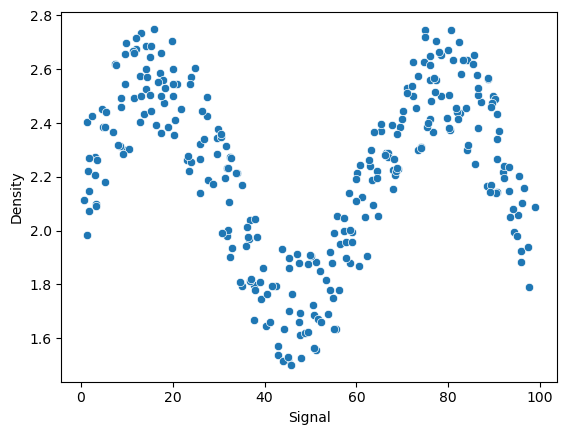

In [4]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [12]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.1, random_state=101)

In [15]:
#Error when trying to fit

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr_model = LinearRegression()

In [18]:
lr_model.fit(X_train,y_train)


#ERROR

'''
Reshape your data either using array.reshape(-1, 1) 
if your data has a single feature or array.reshape(1, -1) 
if it contains a single sample.
'''

#DONE in 12

'\nReshape your data either using array.reshape(-1, 1) \nif your data has a single feature or array.reshape(1, -1) \nif it contains a single sample.\n'

In [19]:
lr_preds = lr_model.predict(X_test)

In [20]:
lr_preds #Values close to 2.22 i.e something is wrong as all same

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
mean_absolute_error(y_test,lr_preds) #10% error

0.211198973318633

In [27]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [28]:
signal_range = np.arange(0,100)

In [29]:
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [30]:
signal_preds =lr_model.predict(signal_range.reshape(-1,1))

In [31]:
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

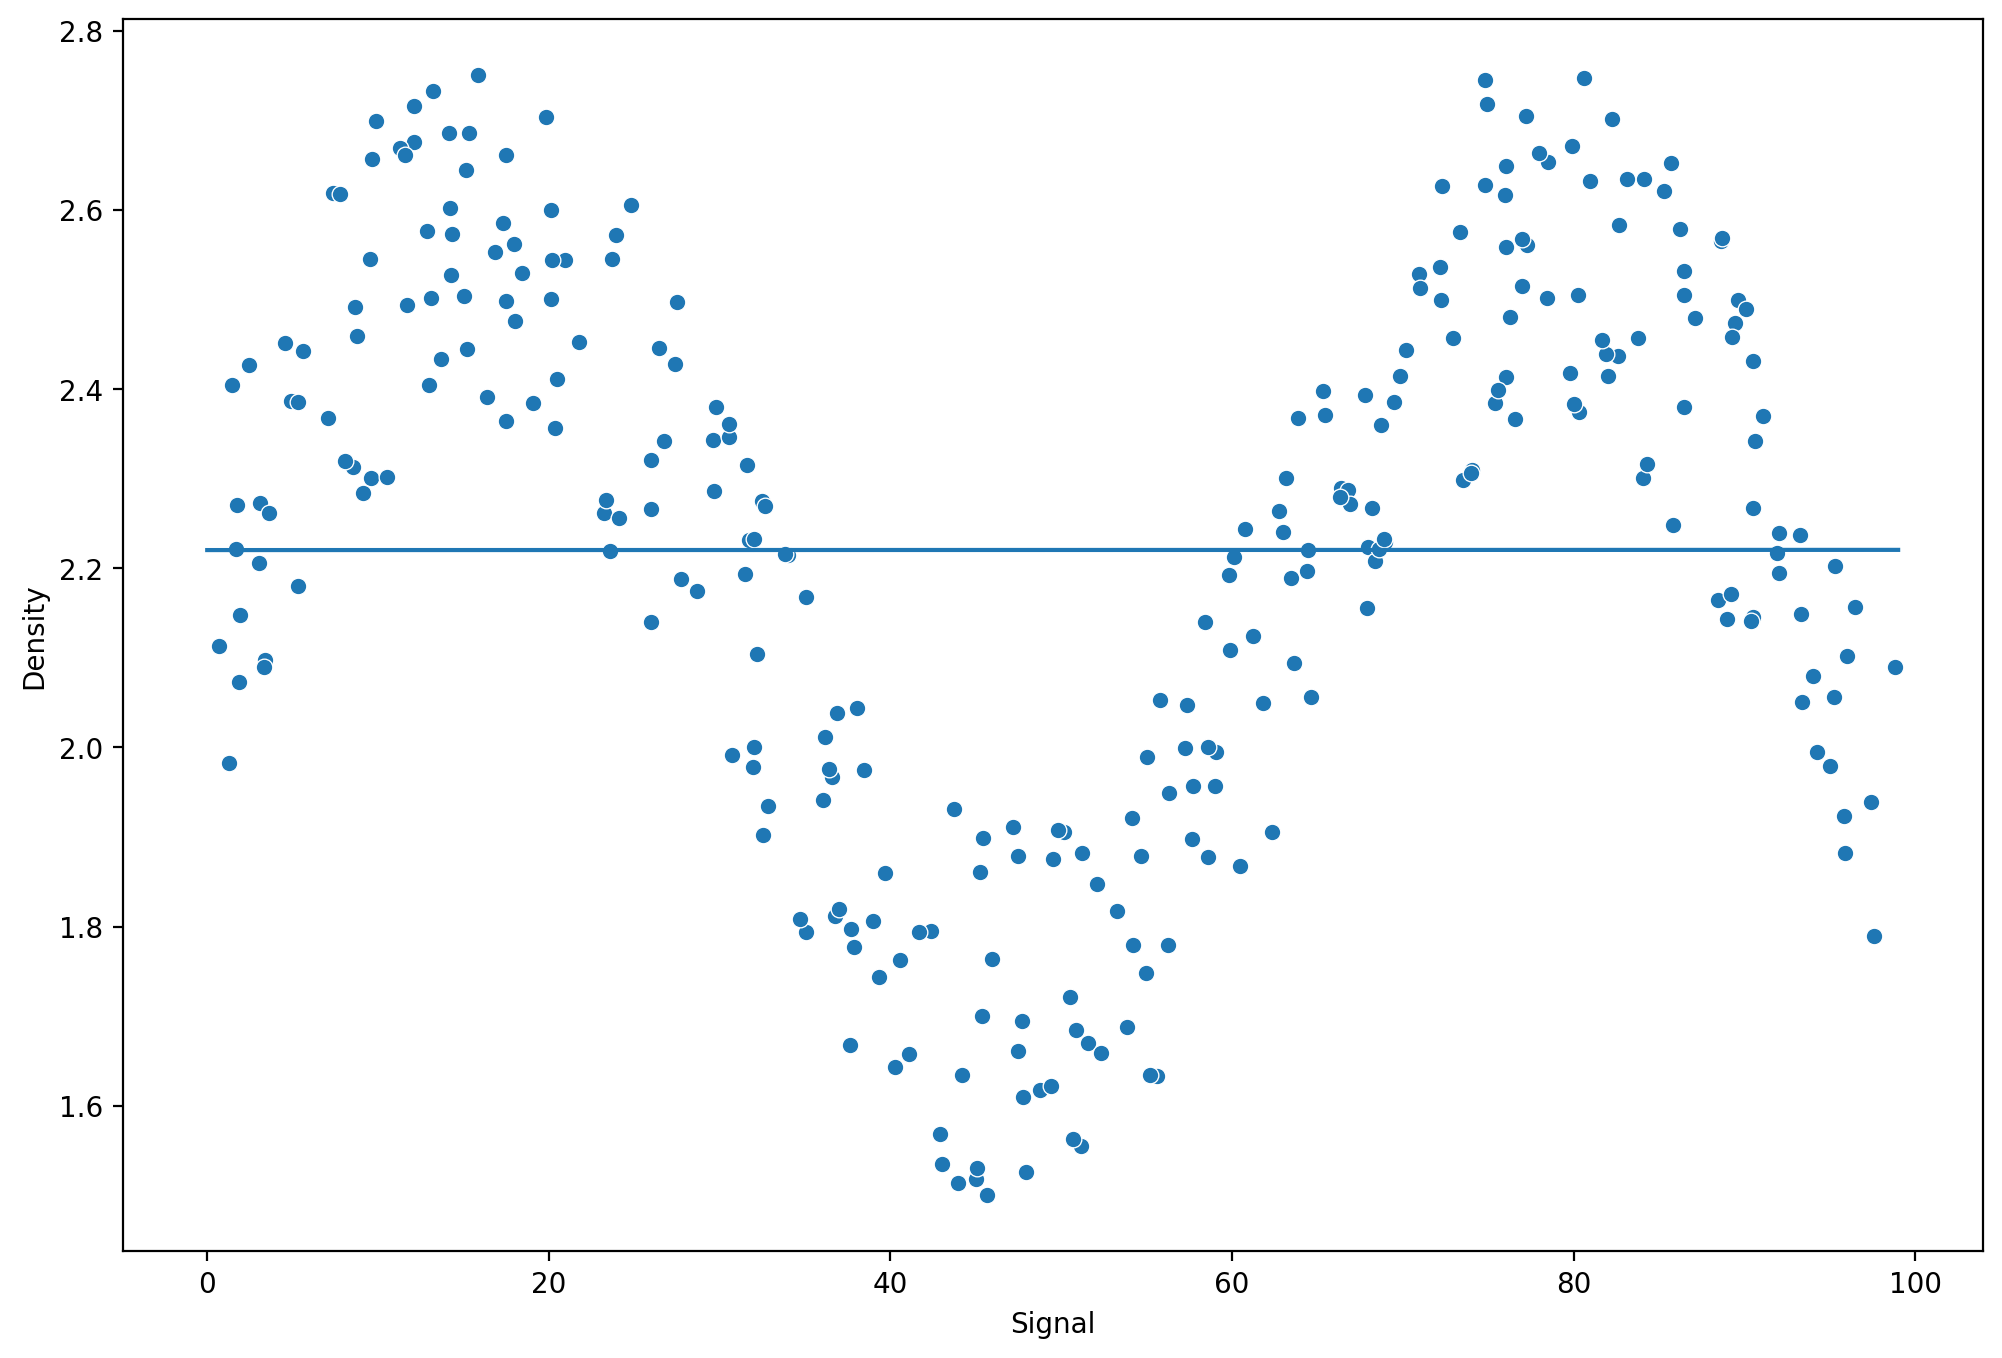

In [33]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df);

plt.plot(signal_range,signal_preds)
#A linear regression cant fit into this data
#Cant fit straight line into curvy things

# Fixing it with polynomial regression

In [35]:
#The problem in previous:-
## All outputs looked similar

In [38]:
def run_model(model,X_train,y_train,X_test,y_test):
    #FIT MODEL TRAINING
    model.fit(X_train,y_train)
    #GET METRICS
    preds=model.predict(X_test)
    rmse =np.sqrt(mean_squared_error(y_test,preds))
    mae =mean_absolute_error(y_test,preds)
    print(f'MAE:{mae}')
    print(f'RMSE:{rmse}')
    #PLOT RESULTS MODEL SIGNAL RANGE
    signal_range=np.arange(0,100)
    output=model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black');

    plt.plot(signal_range,output)
    

MAE:0.211198973318633
RMSE:0.2570051996584629


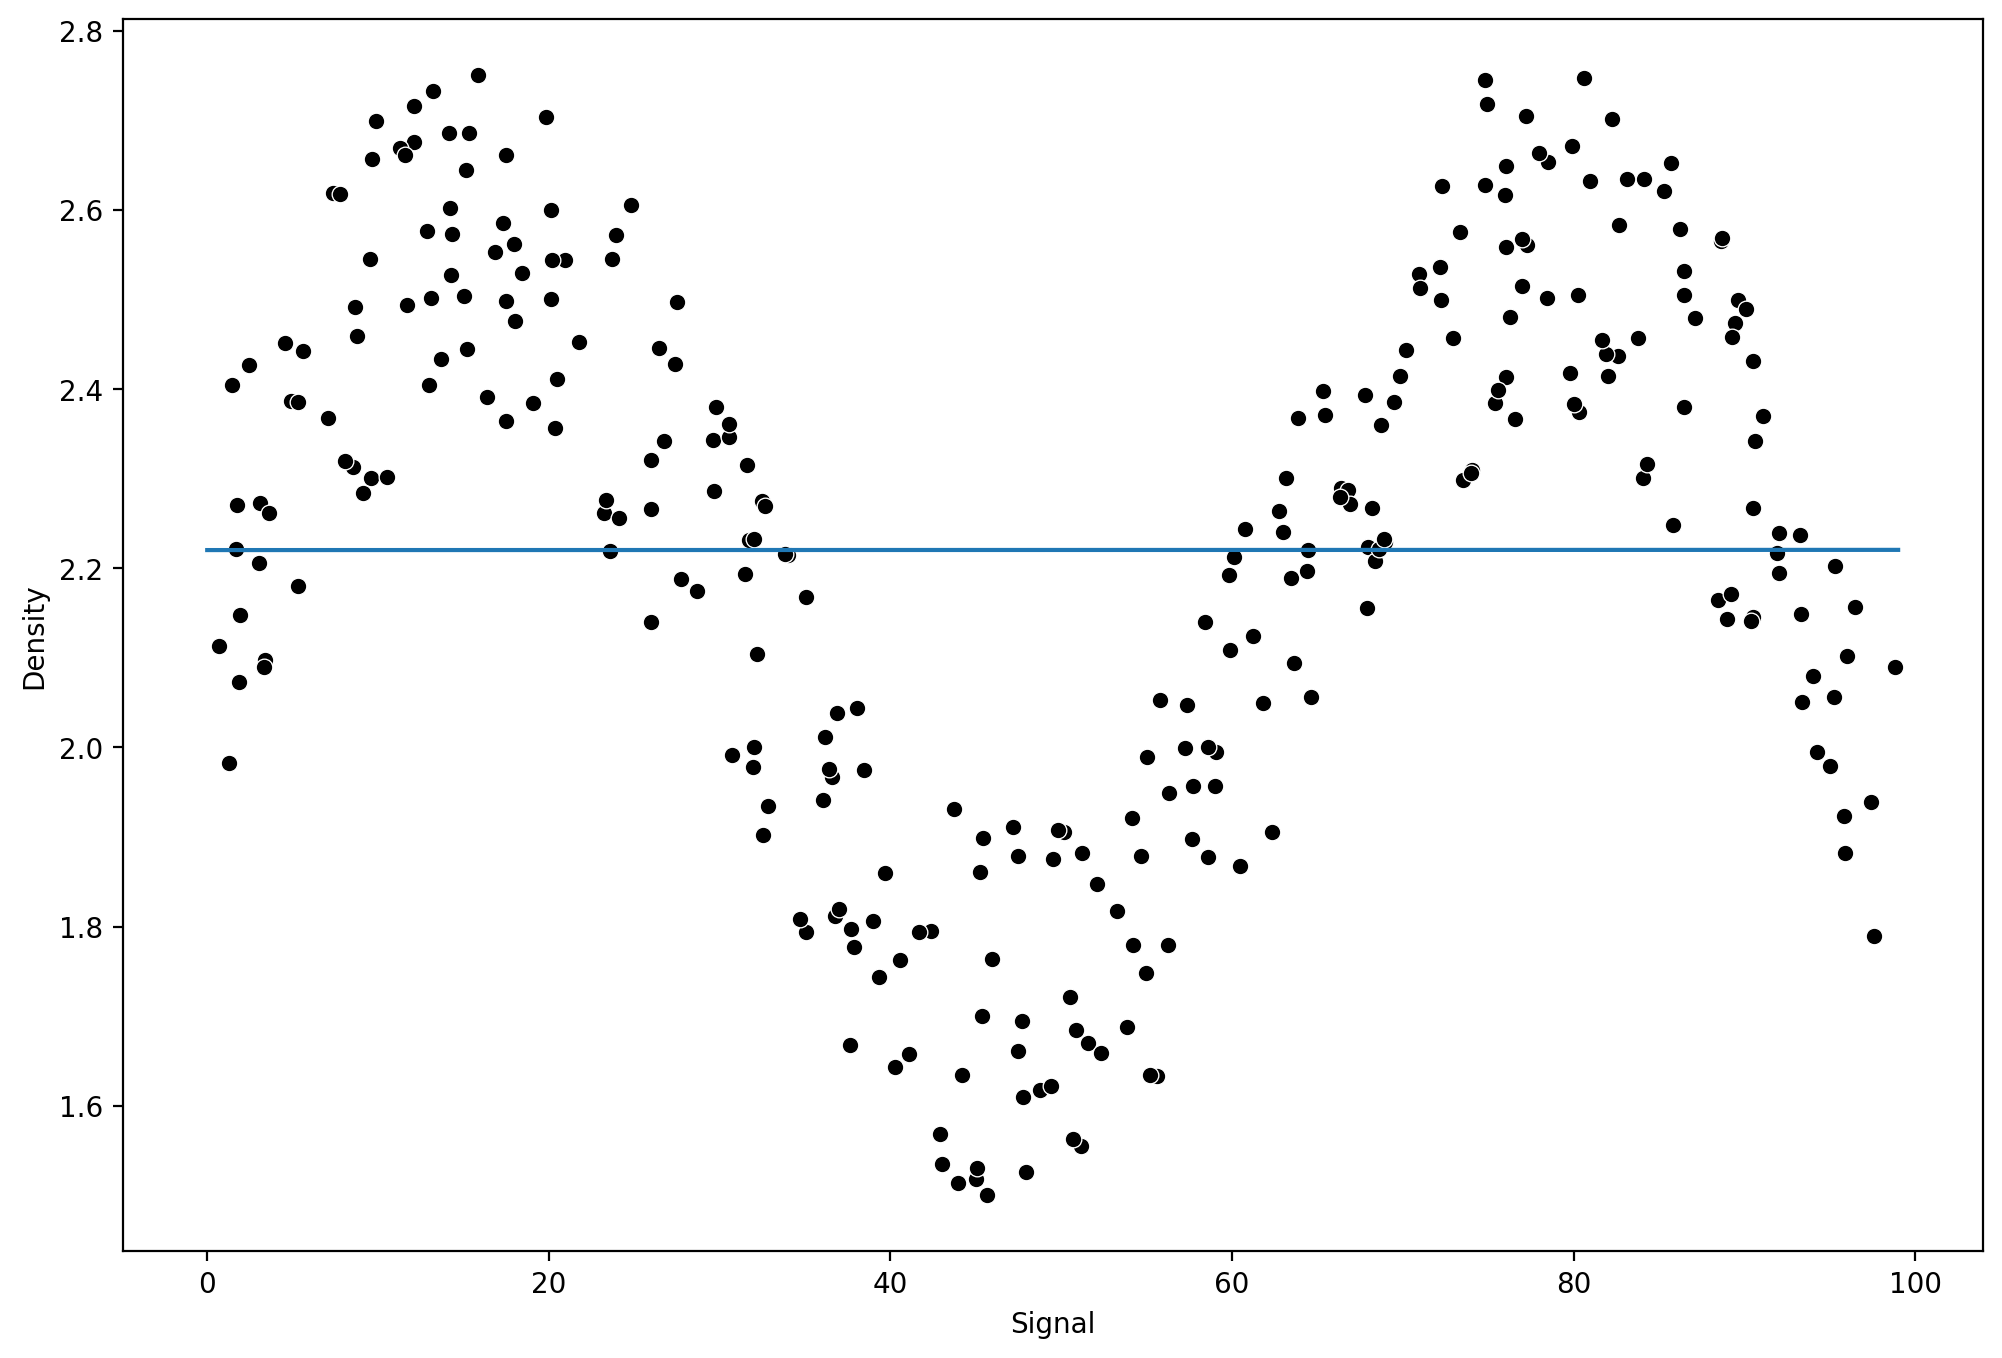

In [39]:
model= LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [48]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

MAE:0.11969072819723765
RMSE:0.13807364110090142


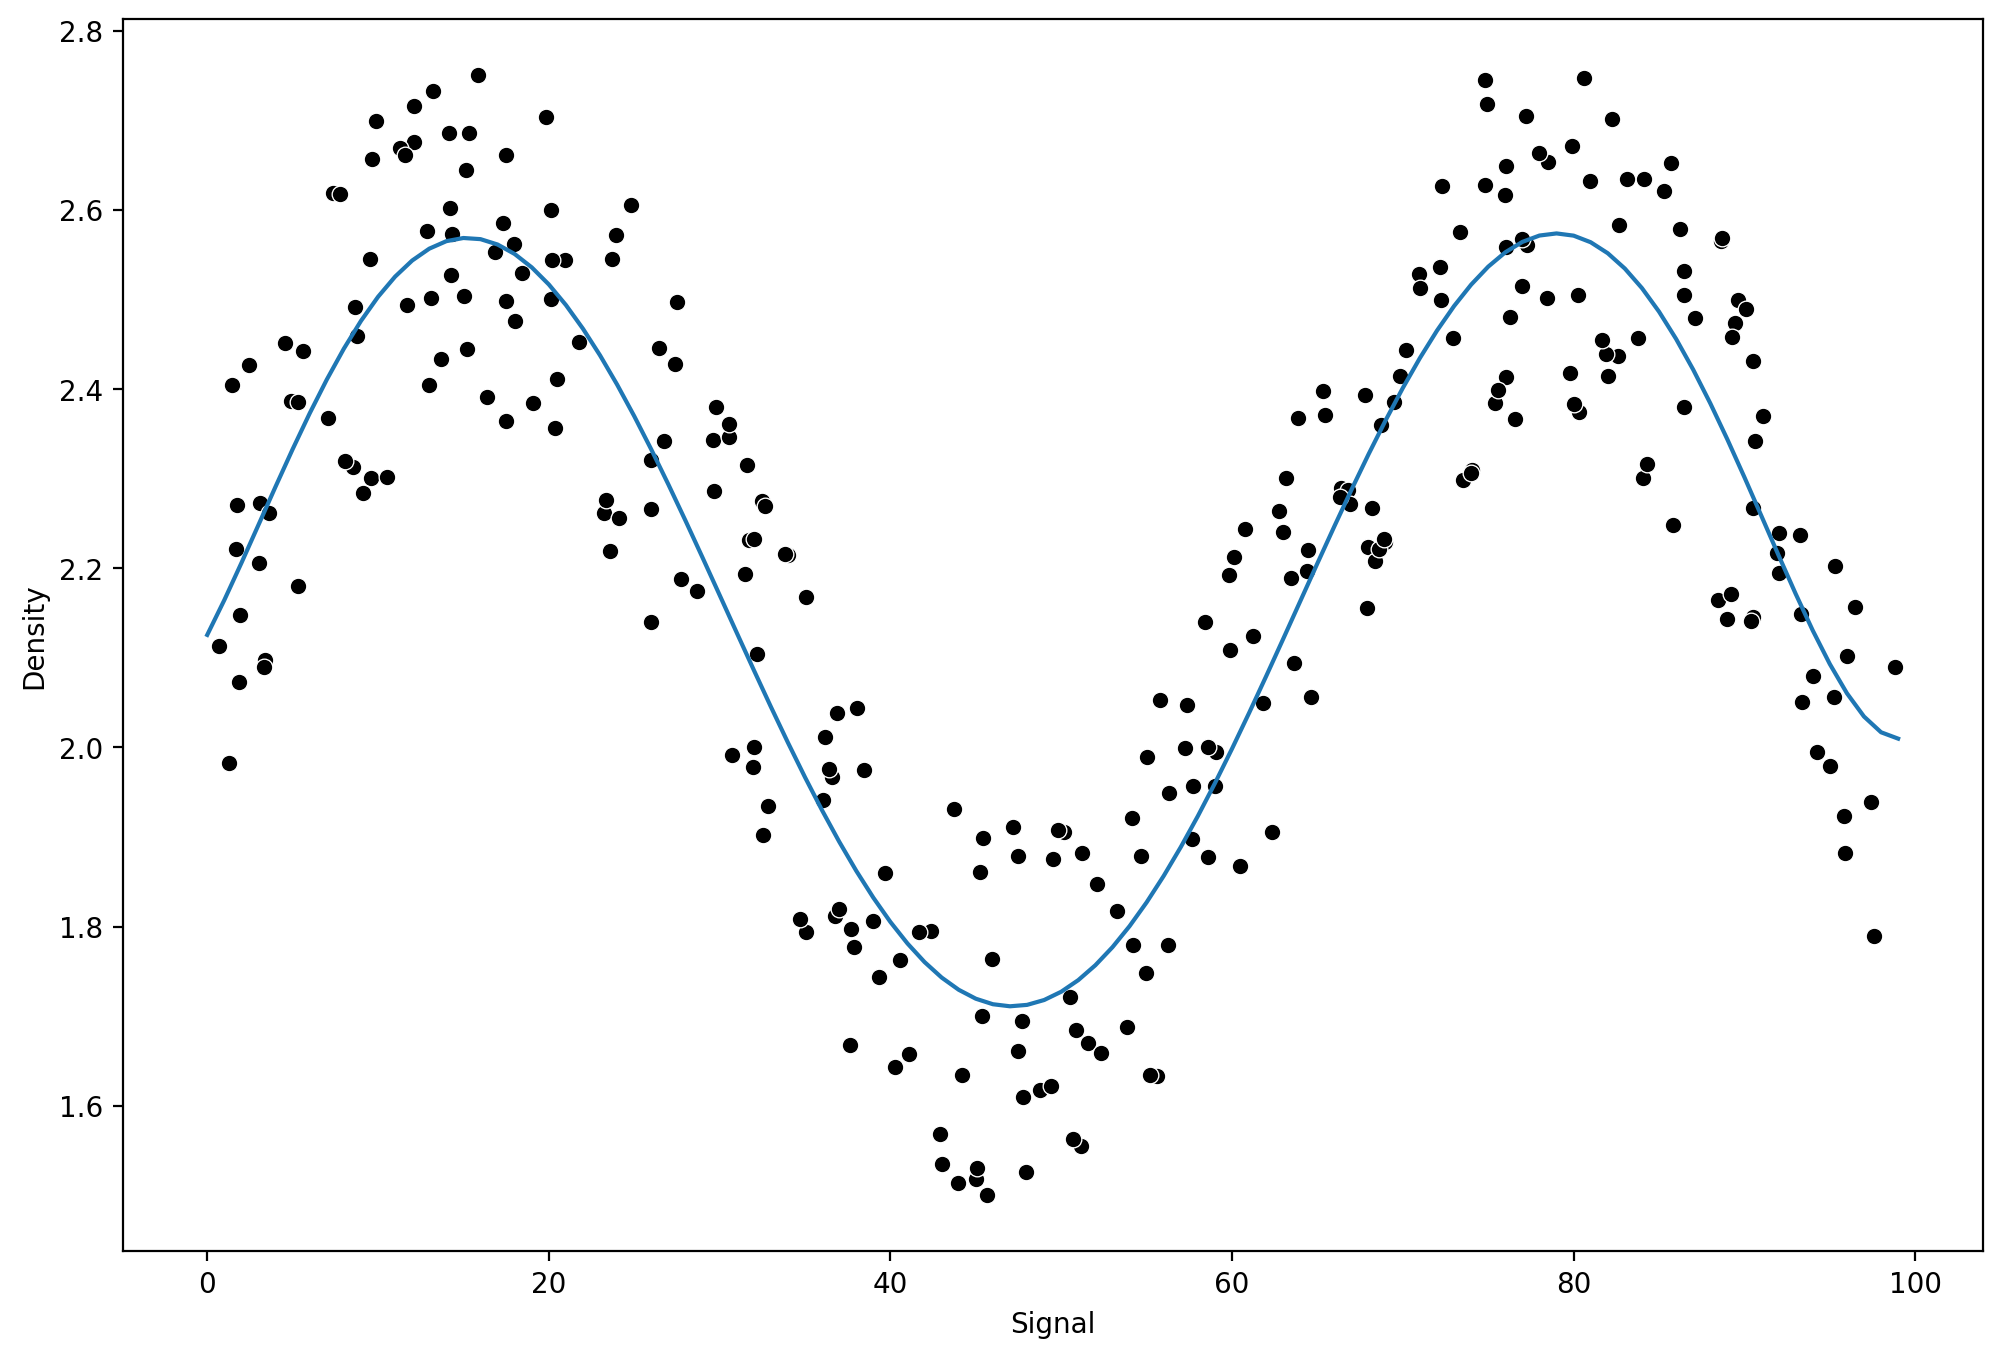

In [49]:
run_model(pipe,X_train,y_train,X_test,y_test)

#As we change degree we change the graph shape